In [1]:
# Let's show some of the training images, for fun.
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [2]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

In [3]:
device = ""
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
print(device)

transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)

train_set = torchvision.datasets.MNIST(
    root="./Data", train=True, download=True, transform=transform
)

batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

cuda


In [4]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(x.size(0), 784)
        output = self.model(x)
        return output

discriminator = Discriminator().to(device=device)

In [5]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )

    def forward(self, x):
        output = self.model(x)
        output = output.view(x.size(0) , 1, 28, 28)
        return output

generator = Generator().to(device=device)
#generator = Generator()

In [6]:
lr = 0.0001
num_epochs = 50
loss_function = nn.BCELoss()

optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

Epoch: 0 Loss D.: 0.5223222970962524
Epoch: 0 Loss G.: 0.5463278889656067


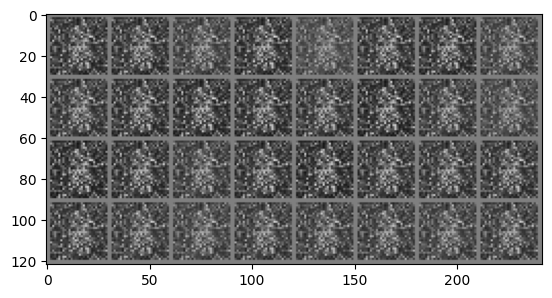

Epoch: 1 Loss D.: 4.586084105540067e-05
Epoch: 1 Loss G.: 19.053550720214844


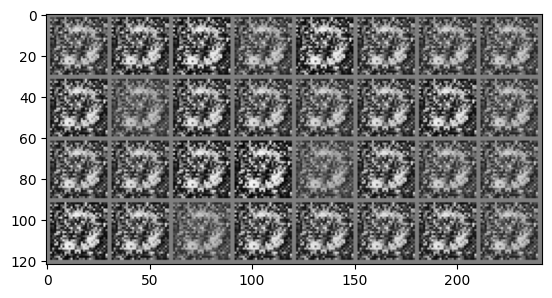

Epoch: 2 Loss D.: 0.014453967101871967
Epoch: 2 Loss G.: 4.109895706176758


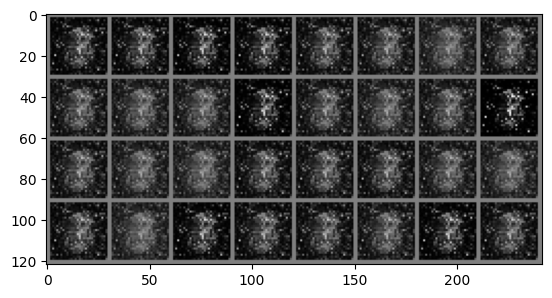

Epoch: 3 Loss D.: 0.24449744820594788
Epoch: 3 Loss G.: 5.756772994995117


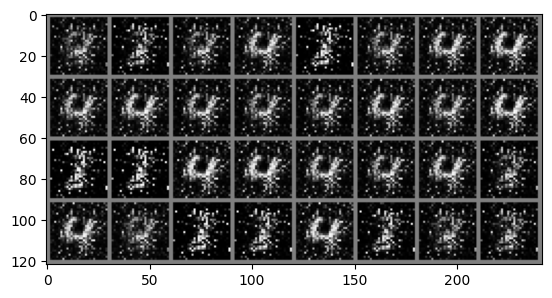

Epoch: 4 Loss D.: 0.08308689296245575
Epoch: 4 Loss G.: 5.761831283569336


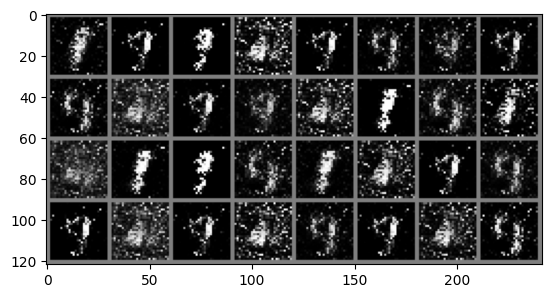

Epoch: 5 Loss D.: 0.0259365476667881
Epoch: 5 Loss G.: 3.2016067504882812


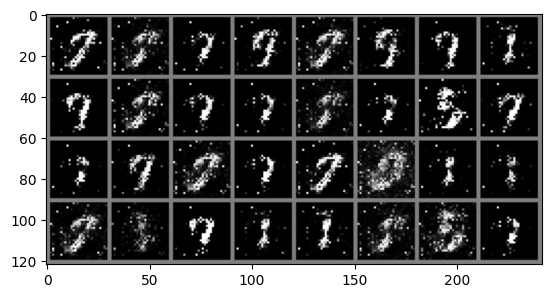

Epoch: 6 Loss D.: 0.12413294613361359
Epoch: 6 Loss G.: 3.4513611793518066


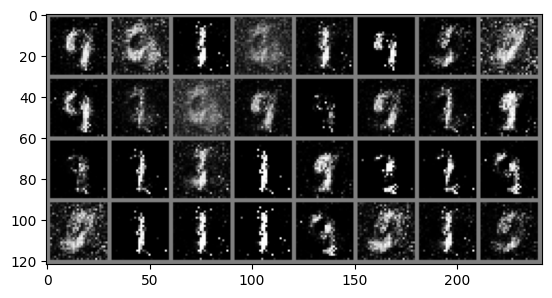

Epoch: 7 Loss D.: 0.2979589104652405
Epoch: 7 Loss G.: 2.73555326461792


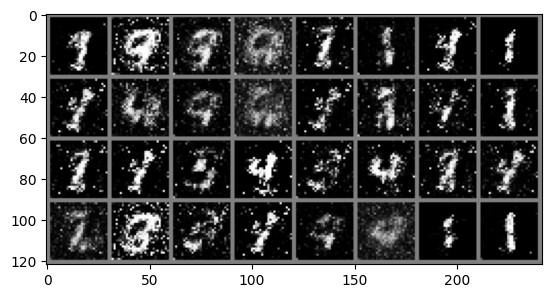

Epoch: 8 Loss D.: 0.47863176465034485
Epoch: 8 Loss G.: 2.4493672847747803


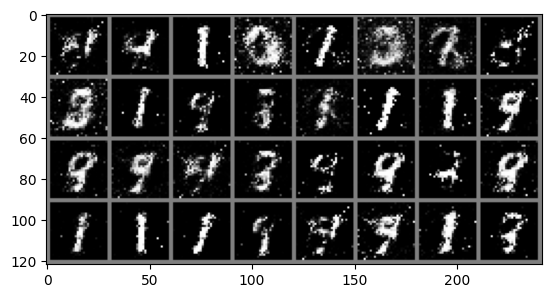

Epoch: 9 Loss D.: 0.3696161210536957
Epoch: 9 Loss G.: 2.242358446121216


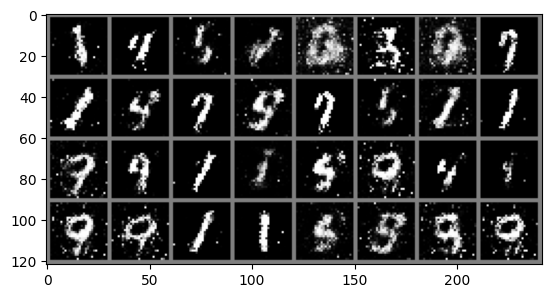

Epoch: 10 Loss D.: 0.37087956070899963
Epoch: 10 Loss G.: 2.5540411472320557


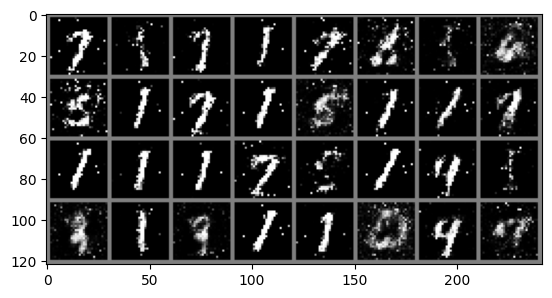

Epoch: 11 Loss D.: 0.3579697012901306
Epoch: 11 Loss G.: 1.590087652206421


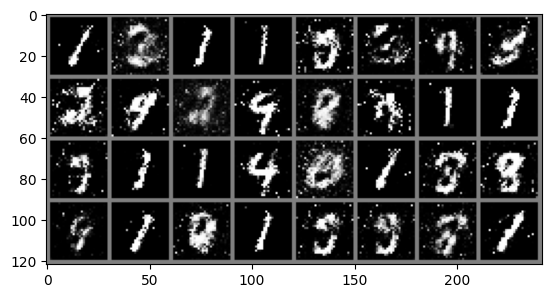

Epoch: 12 Loss D.: 0.27708080410957336
Epoch: 12 Loss G.: 1.6004927158355713


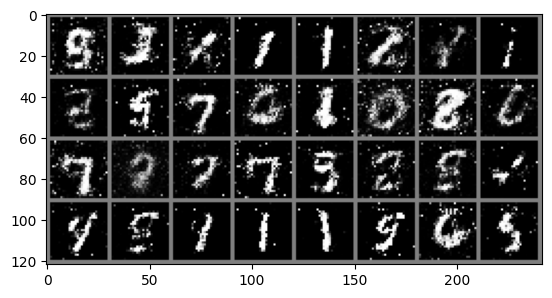

Epoch: 13 Loss D.: 0.47624534368515015
Epoch: 13 Loss G.: 1.9943530559539795


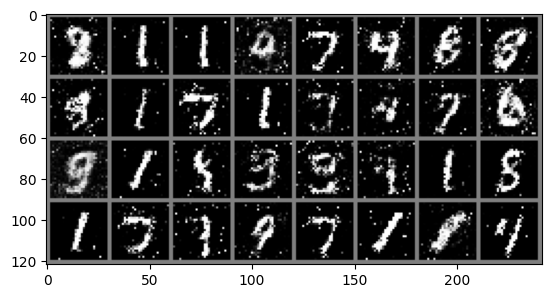

Epoch: 14 Loss D.: 0.5351415872573853
Epoch: 14 Loss G.: 1.4962773323059082


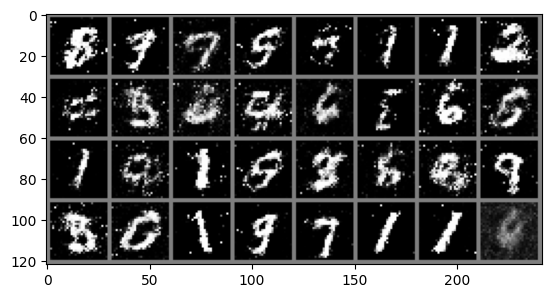

Epoch: 15 Loss D.: 0.6246328949928284
Epoch: 15 Loss G.: 1.6636306047439575


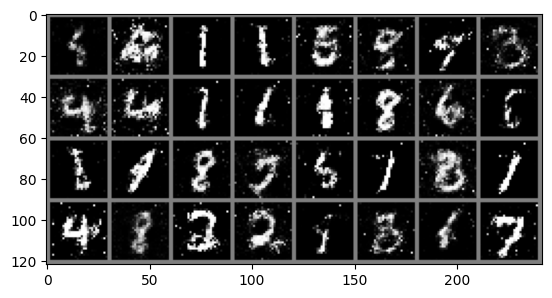

Epoch: 16 Loss D.: 0.47695982456207275
Epoch: 16 Loss G.: 1.3997342586517334


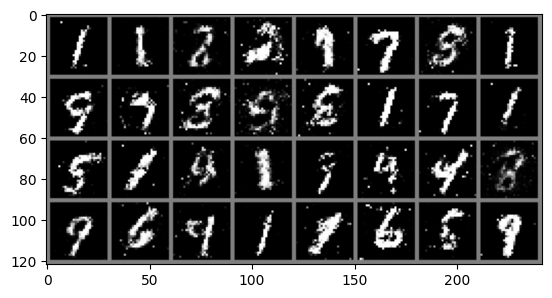

Epoch: 17 Loss D.: 0.48865044116973877
Epoch: 17 Loss G.: 1.0970227718353271


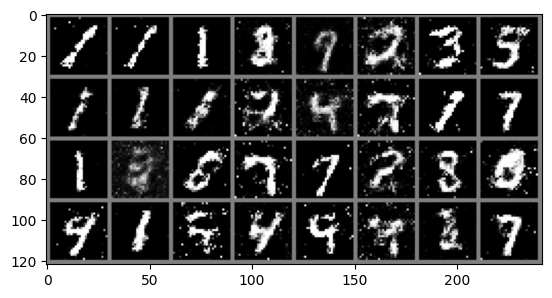

Epoch: 18 Loss D.: 0.47476956248283386
Epoch: 18 Loss G.: 1.2996022701263428


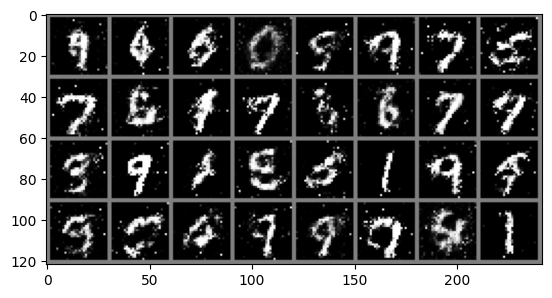

Epoch: 19 Loss D.: 0.5881295204162598
Epoch: 19 Loss G.: 1.2591025829315186


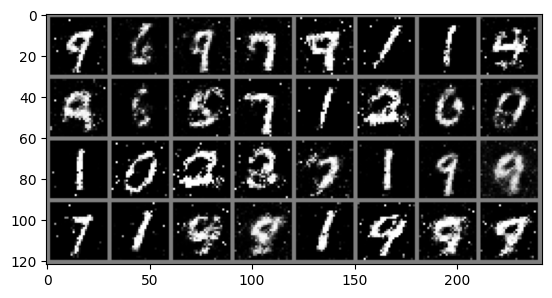

Epoch: 20 Loss D.: 0.5653625726699829
Epoch: 20 Loss G.: 1.1421618461608887


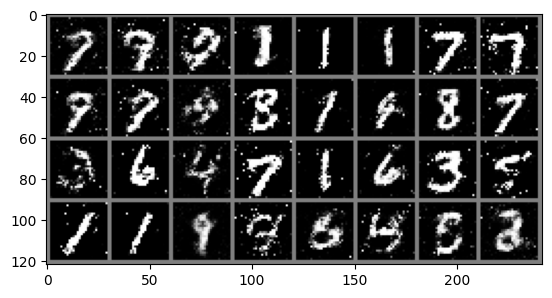

Epoch: 21 Loss D.: 0.511252224445343
Epoch: 21 Loss G.: 1.2310374975204468


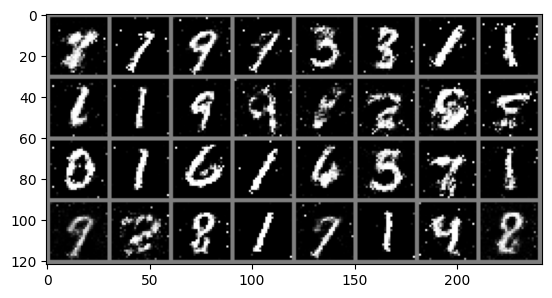

Epoch: 22 Loss D.: 0.6791243553161621
Epoch: 22 Loss G.: 1.4187294244766235


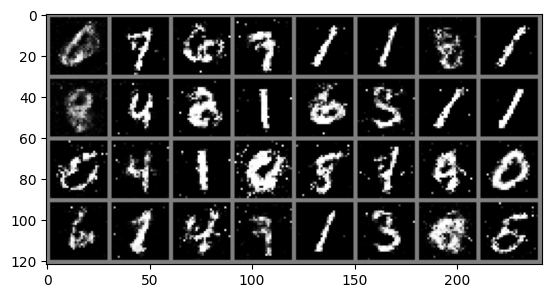

Epoch: 23 Loss D.: 0.5651416182518005
Epoch: 23 Loss G.: 1.3077744245529175


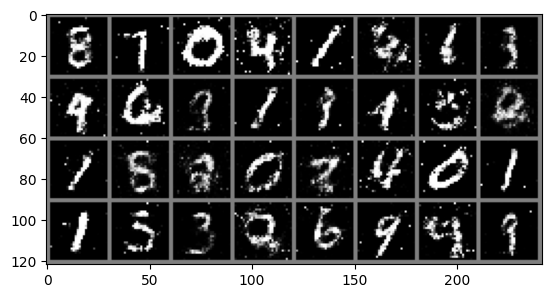

Epoch: 24 Loss D.: 0.5668011903762817
Epoch: 24 Loss G.: 1.048067569732666


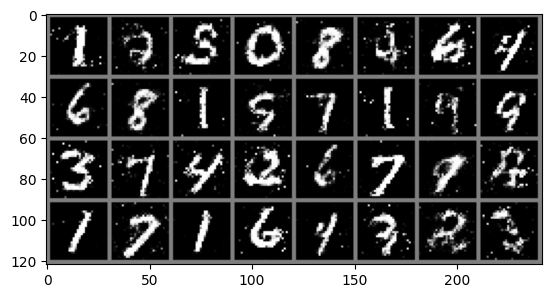

Epoch: 25 Loss D.: 0.5339915156364441
Epoch: 25 Loss G.: 1.0644965171813965


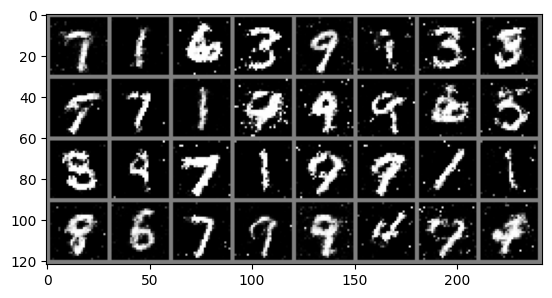

Epoch: 26 Loss D.: 0.41941624879837036
Epoch: 26 Loss G.: 0.9747329950332642


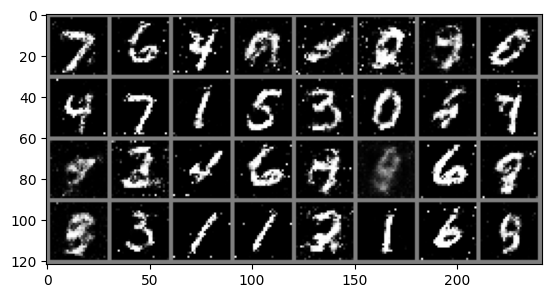

Epoch: 27 Loss D.: 0.5369918346405029
Epoch: 27 Loss G.: 1.1046984195709229


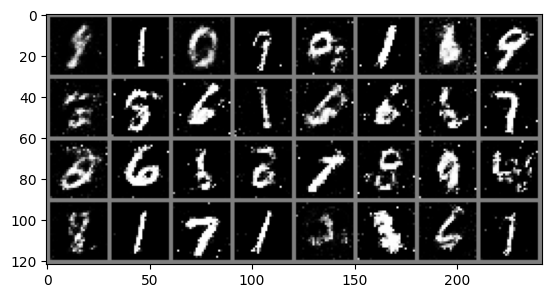

Epoch: 28 Loss D.: 0.4442114233970642
Epoch: 28 Loss G.: 1.196220874786377


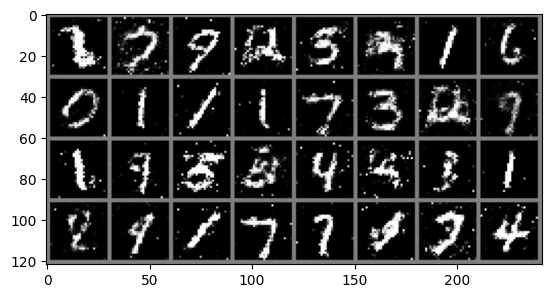

Epoch: 29 Loss D.: 0.6231957674026489
Epoch: 29 Loss G.: 1.1513233184814453


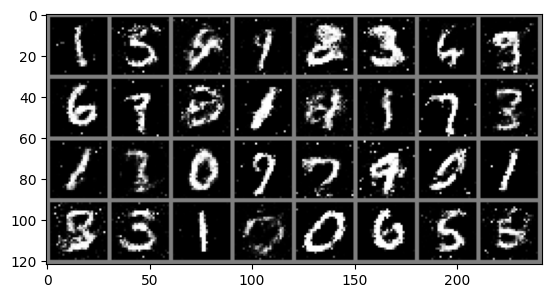

Epoch: 30 Loss D.: 0.6011337637901306
Epoch: 30 Loss G.: 1.0953032970428467


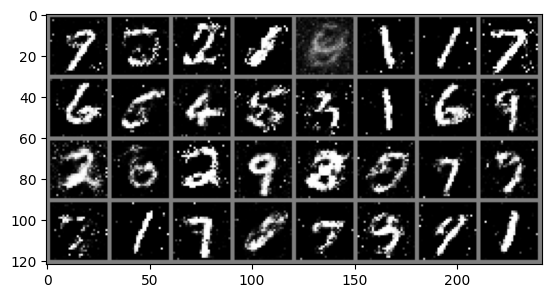

Epoch: 31 Loss D.: 0.6418530344963074
Epoch: 31 Loss G.: 1.0467357635498047


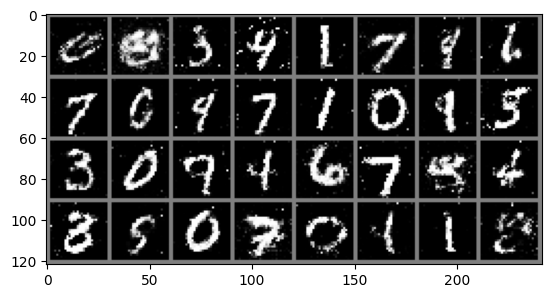

Epoch: 32 Loss D.: 0.6273936033248901
Epoch: 32 Loss G.: 1.166481614112854


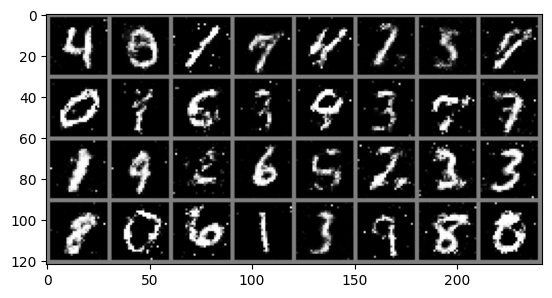

Epoch: 33 Loss D.: 0.6044967770576477
Epoch: 33 Loss G.: 1.1579196453094482


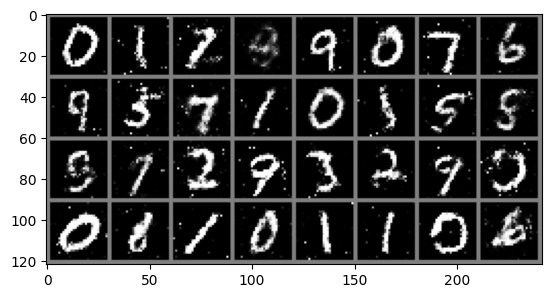

Epoch: 34 Loss D.: 0.6318661570549011
Epoch: 34 Loss G.: 1.207314133644104


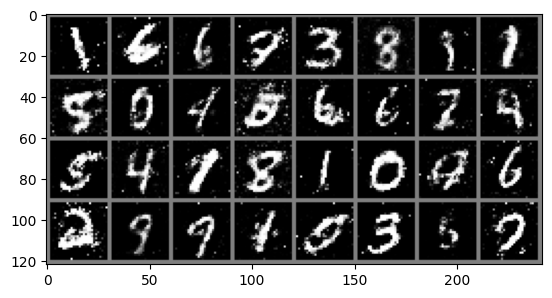

Epoch: 35 Loss D.: 0.5442506074905396
Epoch: 35 Loss G.: 1.1207518577575684


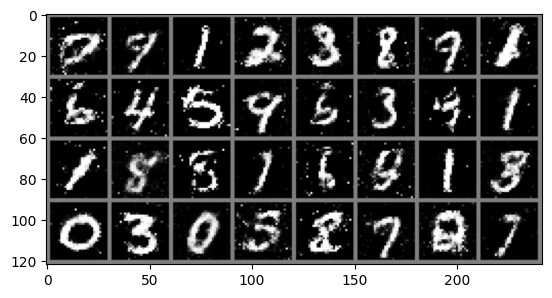

Epoch: 36 Loss D.: 0.5773419141769409
Epoch: 36 Loss G.: 0.9304971098899841


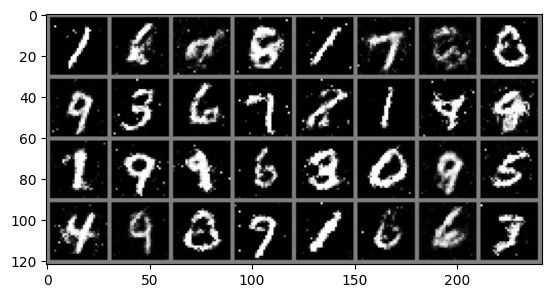

Epoch: 37 Loss D.: 0.5997451543807983
Epoch: 37 Loss G.: 1.075833797454834


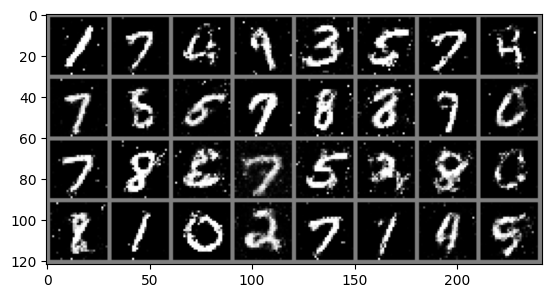

Epoch: 38 Loss D.: 0.5659593343734741
Epoch: 38 Loss G.: 1.0092735290527344


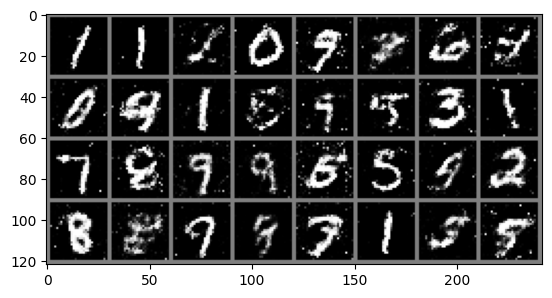

Epoch: 39 Loss D.: 0.5037504434585571
Epoch: 39 Loss G.: 1.1655890941619873


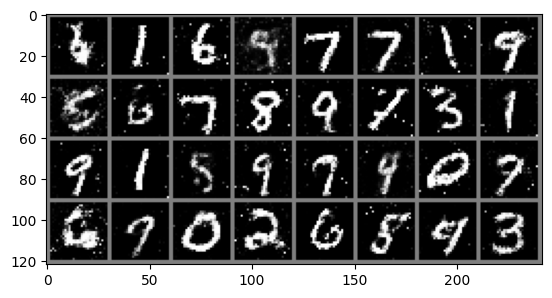

Epoch: 40 Loss D.: 0.627605676651001
Epoch: 40 Loss G.: 1.0343636274337769


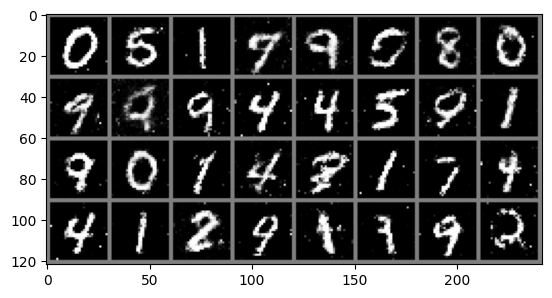

Epoch: 41 Loss D.: 0.5568718910217285
Epoch: 41 Loss G.: 1.1781984567642212


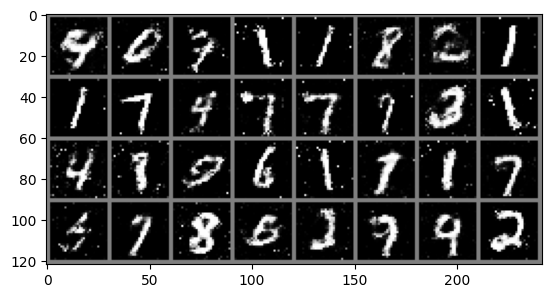

Epoch: 42 Loss D.: 0.6437620520591736
Epoch: 42 Loss G.: 1.081002950668335


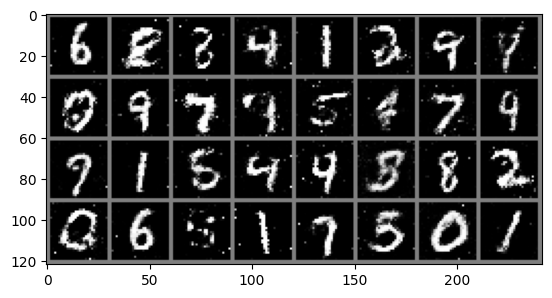

Epoch: 43 Loss D.: 0.5955249071121216
Epoch: 43 Loss G.: 0.9264901876449585


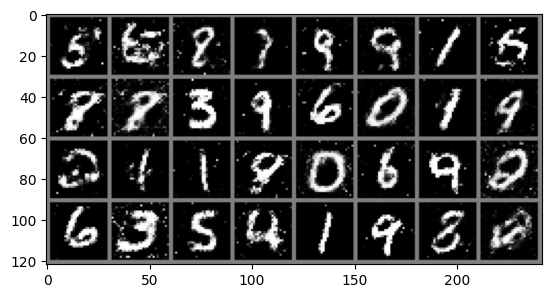

Epoch: 44 Loss D.: 0.628371000289917
Epoch: 44 Loss G.: 0.9980746507644653


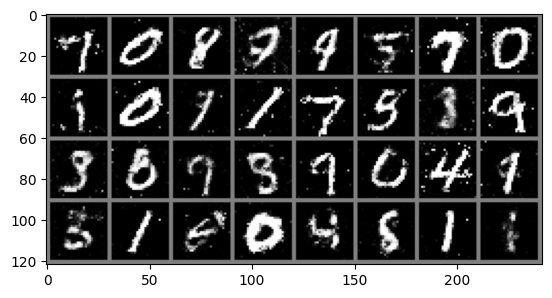

Epoch: 45 Loss D.: 0.5231318473815918
Epoch: 45 Loss G.: 1.1081738471984863


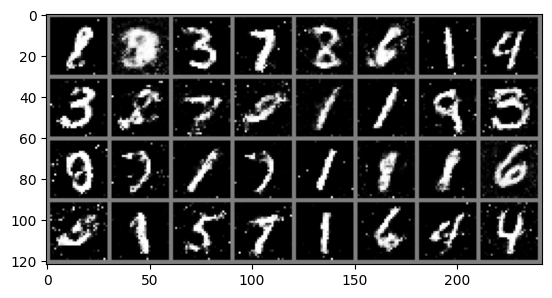

Epoch: 46 Loss D.: 0.6145520806312561
Epoch: 46 Loss G.: 1.0847885608673096


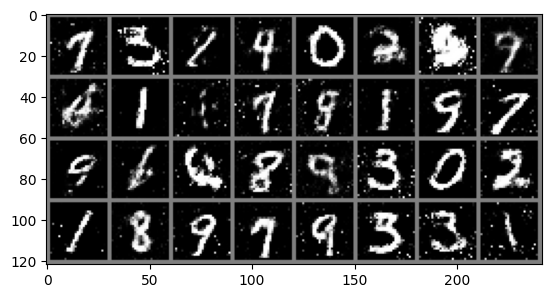

Epoch: 47 Loss D.: 0.5722509622573853
Epoch: 47 Loss G.: 1.137122392654419


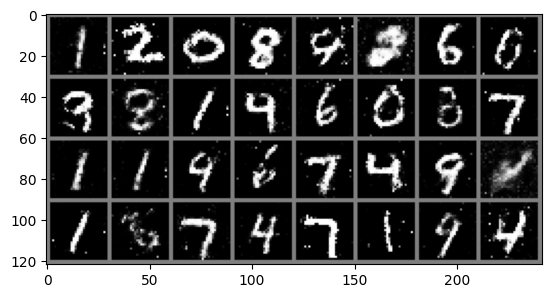

Epoch: 48 Loss D.: 0.546944260597229
Epoch: 48 Loss G.: 1.1928377151489258


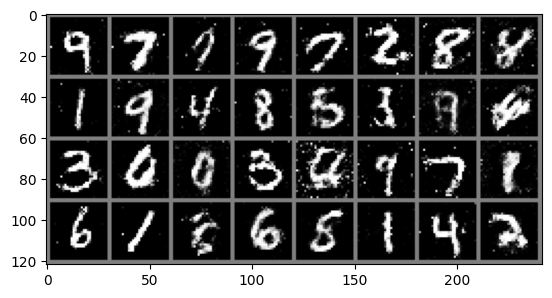

Epoch: 49 Loss D.: 0.566267728805542
Epoch: 49 Loss G.: 1.0341103076934814


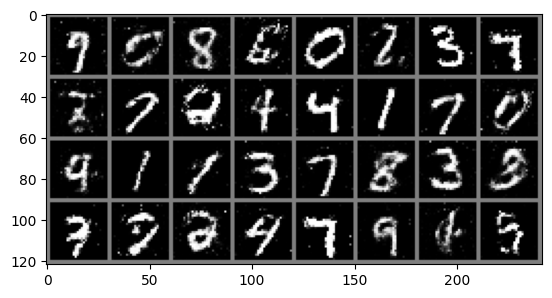

In [7]:
for epoch in range(num_epochs):
    for n, (real_samples, mnist_labels) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples = real_samples.to(device=device)
        real_samples_labels = torch.ones((batch_size, 1)).to(
            device=device
        )
        latent_space_samples = torch.randn((batch_size, 100)).to(
            device=device
        )
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1)).to(
            device=device
        )
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels
        )
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 100)).to(
            device=device
        )

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")
            
            imshow(torchvision.utils.make_grid(generated_samples.cpu()))

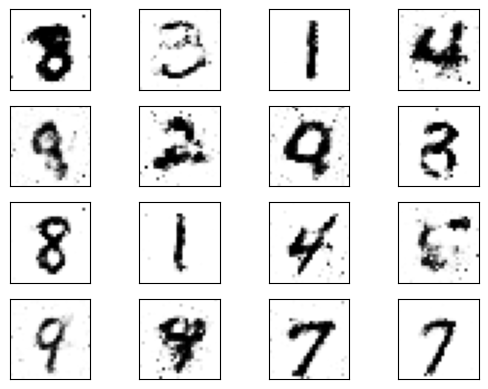

In [8]:
generated_samples = generated_samples.cpu().detach()
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(generated_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])